<a href="https://colab.research.google.com/github/Philz7789/CP3-Padchayapong-Kardosoth/blob/main/Vehicle_Sales_Data_Analyzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***โจทย์ 3 ข้อ***
1. BEV และ ฺPHEV มีกี่คันจากข้อมูลชุดนี้
2. เรียงลำดับยี่ห้อรถประเภท BEV ที่มีการใช้งาน**มากที่สุด 10 อันดับแรก** ใน USA
3. แสดงผลของการใช้งานรถ BEV ในเมืองต่างๆ มากที่สุด **5 อันดับแรก**ของ USA

In [8]:
import pandas as pd
evp = pd.read_csv('Electric_Vehicle_Population_Data.csv')
evp

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


***เริ่มการหาคำตอบ ข้อที่ 1 : BEV และ PHEV มีกี่คัน จากข้อมูลชุดนี้***

In [12]:
evp['Electric Vehicle Type']

0                 Battery Electric Vehicle (BEV)
1         Plug-in Hybrid Electric Vehicle (PHEV)
2         Plug-in Hybrid Electric Vehicle (PHEV)
3                 Battery Electric Vehicle (BEV)
4         Plug-in Hybrid Electric Vehicle (PHEV)
                           ...                  
150477            Battery Electric Vehicle (BEV)
150478            Battery Electric Vehicle (BEV)
150479            Battery Electric Vehicle (BEV)
150480    Plug-in Hybrid Electric Vehicle (PHEV)
150481            Battery Electric Vehicle (BEV)
Name: Electric Vehicle Type, Length: 150482, dtype: object

In [14]:
evp[evp['Electric Vehicle Type'].apply(lambda member: 'BEV' in member)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150476,1G1FZ6S03N,Snohomish,Bothell,WA,98021.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,218241271,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [15]:
evp[evp['Electric Vehicle Type'].apply(lambda member: 'PHEV' in member)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
6,2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
11,3FA6P0SU9G,Kitsap,Port Orchard,WA,98367.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,212561716,POINT (-122.6851642 47.506453),PUGET SOUND ENERGY INC,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150447,1G1RF6E47E,Spokane,Spokane,WA,99203.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,6.0,171425369,POINT (-117.425265 47.635365),MODERN ELECTRIC WATER COMPANY,5.306300e+10
150449,KNDRMDLH7P,Island,Oak Harbor,WA,98277.0,2023,KIA,SORENTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,10.0,251763165,POINT (-122.67499 48.287295),PUGET SOUND ENERGY INC,5.302997e+10
150456,1G1RH6E47D,Pierce,Tacoma,WA,98409.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.0,236436497,POINT (-122.47913 47.2198),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
150473,YV4BR0CZ5N,Howard,Ellicott City,MD,21042.0,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,NaN,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10


***จากโจทย์ข้อที่ 1 ***

สามารถตอบคำถามได้ว่า

จำนวนรถประเภท BEV มีทั้งหมด 116,807 คัน

และรถประเภท PHEV มีทั้งหมด 33,675 คัน

In [24]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

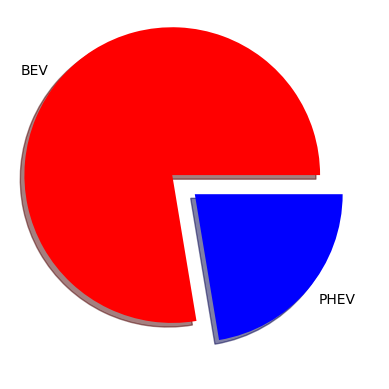

In [38]:
cars = np.array([116807, 33675])
cars_labels = ["BEV","PHEV"]
type_colors = ["r", "b"]
cars_explode = [0.2, 0]

plt.pie(cars, labels = cars_labels, explode = cars_explode,colors = type_colors, shadow = True)
plt.show()

***========================================***

***เริ่มการหาคำตอบข้อที่ 2 : เรียงลำดับยี่ห้อรถประเภท BEV ที่มีการใช้งานมากที่สุด 10 อันดับแรก ใน USA***

In [40]:
bev_list = evp[evp['Electric Vehicle Type'].apply(lambda member: 'BEV' in member)]
bev_list

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150476,1G1FZ6S03N,Snohomish,Bothell,WA,98021.0,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,218241271,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [44]:
bevMaker = bev_list['Make']
bevMaker

0           HYUNDAI
3             TESLA
5             TESLA
7             TESLA
8             TESLA
            ...    
150476    CHEVROLET
150477          BMW
150478        TESLA
150479        TESLA
150481        TESLA
Name: Make, Length: 116807, dtype: object

In [46]:
bevMaker.apply(lambda m: m.split(', ')).explode().unique()

array(['HYUNDAI', 'TESLA', 'AUDI', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN',
       'KIA', 'FIAT', 'CHEVROLET', 'FORD', 'BMW', 'MINI', 'SMART',
       'RIVIAN', 'SUBARU', 'POLESTAR', 'MERCEDES-BENZ', 'PORSCHE',
       'CADILLAC', 'JAGUAR', 'VOLVO', 'GENESIS', 'LUCID', 'LEXUS',
       'MITSUBISHI', 'TH!NK', 'AZURE DYNAMICS'], dtype=object)

In [51]:
bevMakerExplode = bevMaker.explode('Make')
bevMakerExplode

0           HYUNDAI
1             TESLA
2             TESLA
3             TESLA
4             TESLA
            ...    
116802    CHEVROLET
116803          BMW
116804        TESLA
116805        TESLA
116806        TESLA
Name: Make, Length: 116807, dtype: object

In [75]:
counts_maker = bevMakerExplode.value_counts().nlargest(10)
counts_maker

Make
TESLA         68983
NISSAN        13497
CHEVROLET      7136
KIA            4148
VOLKSWAGEN     4074
FORD           3908
HYUNDAI        2695
RIVIAN         2483
BMW            1796
AUDI           1662
Name: count, dtype: int64

In [ ]:
cars_amount = [68983,13497,7136,4148,4074,3908,2695,2483,1796,1662]
cars_maker = ['TESLA','NISSAN','CHEVROLET','KIA','VOLKSWAGEN','FORD','HYUNDAI','RIVIAN','BMW','AUDI']
cars_explode2 = [0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(cars_amount, labels = cars_maker, explode = cars_explode2, autopct='%1.1f%%', pctdistance=0.85, shadow = True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 10 Car Brands (BEV) in USA in 2023')
plt.show()

***ตอบคำถามข้อที่ 2 : เรียงลำดับยี่ห้อรถประเภท BEV ที่มีการใช้งานมากที่สุด 10 อันดับแรก ใน USA***


**10 อันดับแรกของรถยนต์ประเภท BEV ที่มีการใช้งานมากที่สุดใน USA ในปี 2023**

1. TESLA         62.5%
2. NISSAN        12.2%
3. CHEVROLET      6.5%
4. KIA            3.8%
5. VOLKSWAGEN     3.7%
6. FORD           3.5%
7. HYUNDAI        2.4%
8. RIVIAN         2.2%
9. BMW            1.6%
10. AUDI           1.5%


**================================**